In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
file = Path('crypto_data.csv')

In [3]:
df = pd.read_csv(file)

In [4]:
df = pd.DataFrame(df)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
df = df.drop(df.index[df['IsTrading'] == False]).dropna()
df = df.drop('IsTrading', 1).drop('CoinName', 1).drop('Unnamed: 0', 1)

In [6]:
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
df = df.drop(df.index[df['TotalCoinsMined'] <= 0])
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
df["TotalCoinSupply"] = df["TotalCoinSupply"].astype("float64")

In [9]:
df.dummies = pd.get_dummies(df, drop_first = True)

<ipython-input-9-77987c871971>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dummies = pd.get_dummies(df, drop_first = True)


In [10]:
df.dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
scaler = StandardScaler().fit(df.dummies)

In [12]:
df_dummies_scaled = scaler.transform(df.dummies)
df_dummies_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [13]:
pca = PCA(n_components=0.90)

In [14]:
crypto_pca = pca.fit_transform(df_dummies_scaled)

In [15]:
df_crypto_pca = pd.DataFrame(
    data=crypto_pca,
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,3.183613e-14,-4.307861e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,-5.294324e-15,-2.721413e-15,-2.745244e-16,1.919131e-15,-3.705338e-16,7.457279e-15,1.384338e-14,-7.986133e-16,3.789962e-16,-5.733031e-15
1,-0.319249,1.043547,-0.537804,0.001337,3.187439e-14,-4.319697e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,-4.734773e-15,-3.014518e-15,-2.647617e-16,1.362213e-15,-1.482942e-15,7.412818e-15,1.416998e-14,-7.089138e-16,2.847925e-16,-6.013151e-15
2,2.304716,1.669996,-0.624077,0.004420,4.602471e-14,-7.350106e-14,-0.062312,-1.554093,-0.945690,0.375087,...,5.655338e-14,8.880567e-15,3.769017e-14,-7.601444e-14,-4.849038e-15,-7.692561e-14,-1.216897e-13,-3.754344e-14,-9.607806e-14,6.703587e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-1.380459e-14,1.646734e-14,0.000326,0.283548,0.252906,-0.079820,...,6.484176e-15,-1.087028e-14,8.295429e-15,-3.800085e-15,1.194893e-14,-1.951052e-14,-3.312508e-14,-1.368897e-14,-3.033103e-14,-4.111028e-17
4,-0.151951,-2.044976,0.364208,-0.001636,-1.688799e-14,3.633792e-14,0.032350,0.524429,0.191031,0.074021,...,-4.030020e-14,-2.067452e-13,-3.502431e-14,1.700903e-13,4.933194e-14,-1.195100e-13,-1.380746e-13,-6.140614e-14,-1.166793e-13,-1.429782e-13


In [16]:
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [17]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(532, 2)

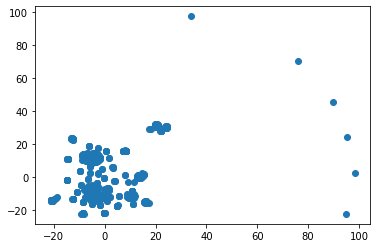

In [18]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

C:\Users\Thissen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


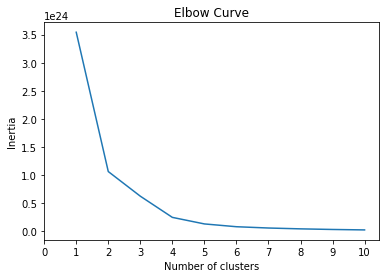

In [19]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df.dummies)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# The cryptocurrencies can be clustered into 4 clusters. Five would be overfitting since there is very little inertia decrease from 4 to 5. Two or three clusters would be an underfit, since there is still a large amount of decrease in inertia from 2 to 3 and again from 3 to 4. 

In [21]:
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,-8.762589,13.109384
1,-2.933121,9.742376
2,-12.389665,22.277479
3,20.787210,30.862478
4,-12.600433,-13.009126
...,...,...
527,18.005871,29.378050
528,-2.533352,13.691249
529,-20.563164,-14.143975
530,-8.565129,-21.379744


In [22]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(k_means_df)

# Predict clusters
predictions = model.predict(k_means_df)

# Create return DataFrame with predicted clusters
k_means_df["class"] = model.labels_
k_means_df.head()

,0,1,class
0,-8.762589,13.109384,2
1,-2.933121,9.742376,2
2,-12.389665,22.277479,2
3,20.787210,30.862478,0
4,-12.600433,-13.009126,3


In [23]:
# Check class value counts
k_means_df['class'].value_counts()

3    221
2    147
1    110
0     54
Name: class, dtype: int64

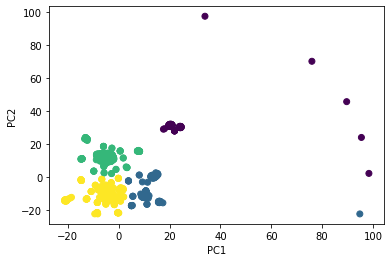

In [24]:
# Visualize the clusters
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()